<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Diego Alvarez Jeria</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

# Ayudantía
## 1.1 Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib



fatal: destination path 'EIE_401_MULTIMEDIA' already exists and is not an empty directory.


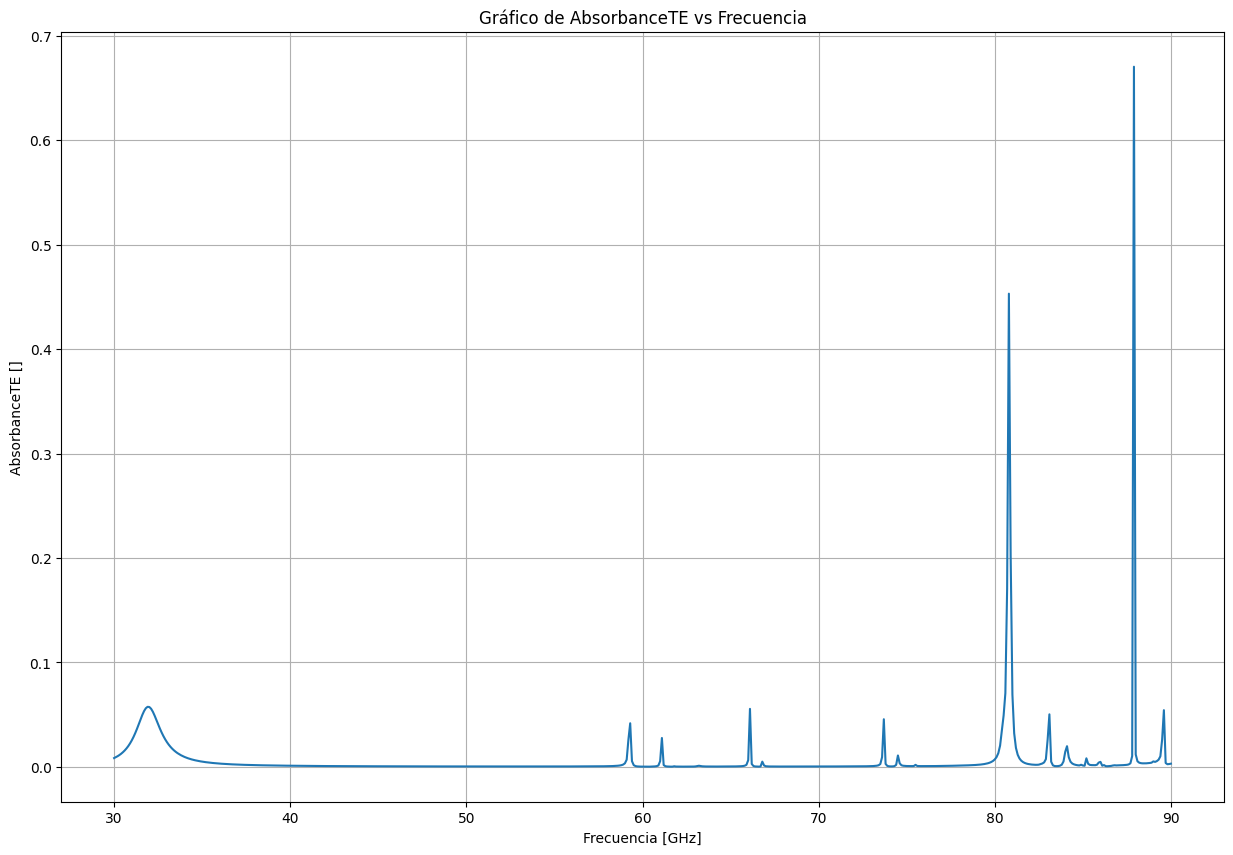

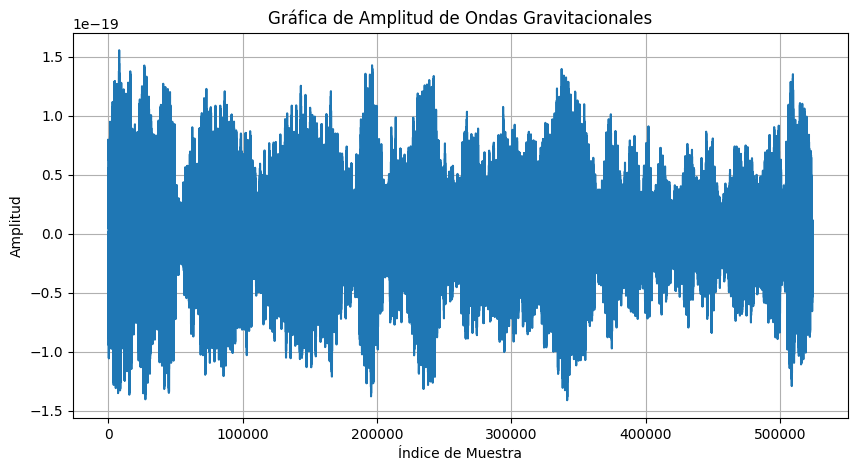

In [45]:
!git clone https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA.git

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gzip
import shutil

# Leer el archivo CSV
df = pd.read_csv(r"EIE_401_MULTIMEDIA/Actividades/Actividad 2/AbsorbanceTE_0-0.csv")

# Seleccionar las columnas
x = df['Freq [GHz]']
y = df['AbsorbanceTE []']

# Crear el primer gráfico
plt.figure(figsize=(15, 10))  # Configurar el tamaño del gráfico
plt.plot(x, y)  # Graficar
plt.xlabel("Frecuencia [GHz]")
plt.ylabel("AbsorbanceTE []")
plt.title("Gráfico de AbsorbanceTE vs Frecuencia")
plt.grid(True)
plt.show()

# Descomprimir el archivo .gz
ruta_archivo_comprimido = 'EIE_401_MULTIMEDIA/Actividades/Actividad 2/H-H1_GWOSC_16KHZ_R1-1268431079-32.txt.gz'
ruta_archivo_descomprimido = 'EIE_401_MULTIMEDIA/Actividades/Actividad 2/H-H1_GWOSC_16KHZ_R1-1268431079-32.txt'

with gzip.open(ruta_archivo_comprimido, 'rb') as archivo_comprimido:
    with open(ruta_archivo_descomprimido, 'wb') as archivo_descomprimido:
        shutil.copyfileobj(archivo_comprimido, archivo_descomprimido)

# Leer el contenido del archivo descomprimido
with open(ruta_archivo_descomprimido, 'r') as file:
    lines = file.readlines()  # Leer todas las líneas
    data = [float(line.strip()) for line in lines[4:]]  # Convertir las líneas a flotantes, ignorando las primeras 4

# Crear el segundo gráfico
plt.figure(figsize=(10, 5))
plt.plot(data)  # Graficar los datos
plt.xlabel('Índice de Muestra')
plt.ylabel('Amplitud')
plt.title('Gráfica de Amplitud de Ondas Gravitacionales')
plt.grid(True)
plt.show()










    
## 1.2 Generar una imagen de una función trigronométrica (función bidimensional) 
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos meustra una onda senoidal. 


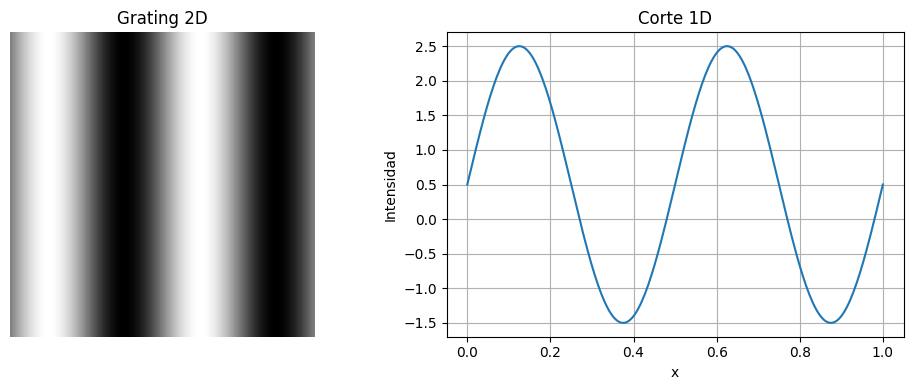

In [ ]:
# Parámetros y malla
x = np.linspace(0,1, 256)
X = np.tile(x, (256, 1))
I = 0.5 + 2 * np.sin(2 * np.pi * 2 * X)

# Mostrar imagen y corte horizontal
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='gray', extent=(0, 1, 0, 1)) 
plt.title("Grating 2D")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(x, I[128])
plt.title("Corte 1D")
plt.xlabel("x")
plt.grid()
plt.ylabel("Intensidad")

plt.tight_layout()
plt.show()

## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizarás para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


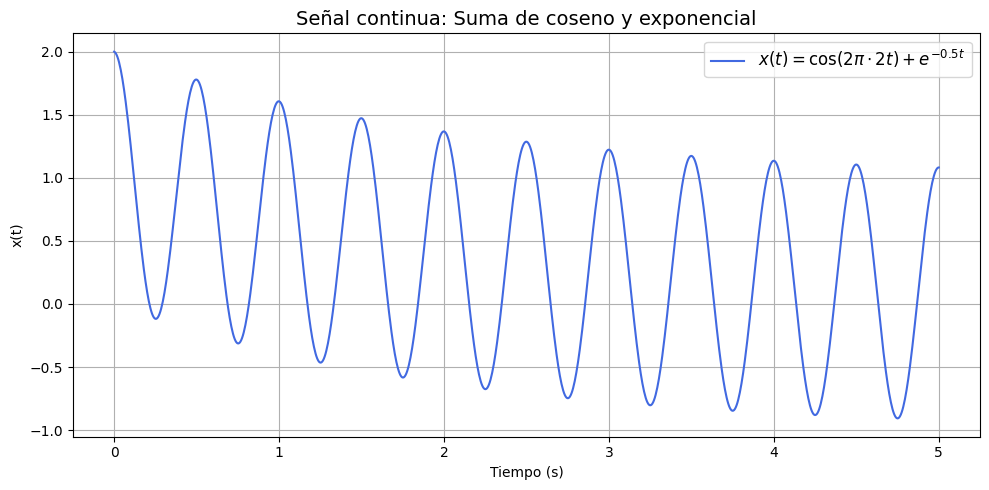

In [47]:
# Parámetros
f1 = 2  # Frecuencia del coseno (Hz)
alpha = 0.5  # Tasa de decaimiento exponencial
t = np.linspace(0, 5, 1000)  # Intervalo de tiempo de 0 a 5 segundos

# Señal definida como suma de coseno y exponencial
def x(t):
    return np.cos(2 * np.pi * f1 * t) + np.exp(-alpha * t)

x_t = x(t)

# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(t, x_t, label=r'$x(t) = \cos(2\pi \cdot 2t) + e^{-0.5t}$', color='royalblue')
plt.title("Señal continua: Suma de coseno y exponencial", fontsize=14)
plt.xlabel("Tiempo (s)")
plt.ylabel("x(t)")
plt.grid(True)
plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.show()

# Celda Markdown con ecuación en LaTeX:
# --------------------------------------
# $$
# x(t) = \cos(2\pi \cdot 2t) + e^{-0.5t}
# $$


# Celda Markdown con ecuación en LaTeX:
$
x(t) = \cos(2\pi \cdot 2t) + e^{-0.5t}
$

## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

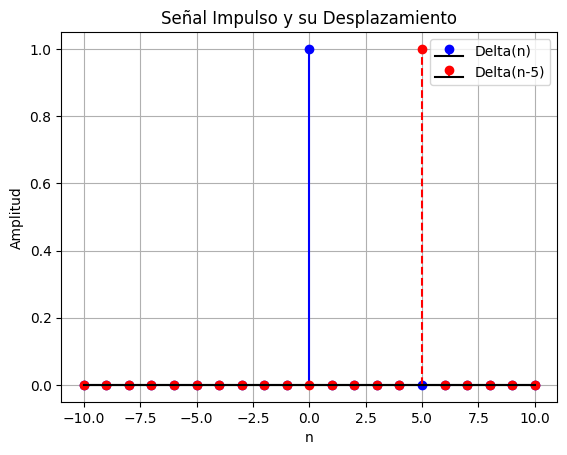

In [48]:
# Parámetros
n = np.arange(-10, 11)  # Rango de tiempo discreto
delta = np.zeros_like(n)  # Inicializamos con ceros
delta[n == 0] = 1         # Impulso en n = 0

# Desplazamiento
desplazamiento = 5
delta_desplazada = np.zeros_like(n)
delta_desplazada[n == desplazamiento] = 1  # Impulso desplazado

# Gráfica
plt.stem(n, delta, linefmt='b-', markerfmt='bo', basefmt='k', label='Delta(n)')
plt.stem(n, delta_desplazada, linefmt='r--', markerfmt='ro', basefmt='k', label=f'Delta(n-{desplazamiento})')
plt.title('Señal Impulso y su Desplazamiento')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

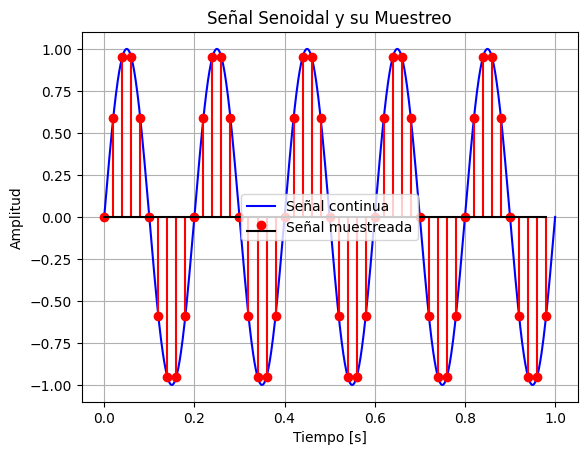

In [49]:
# Parámetros de la señal
f = 5  # Frecuencia de la señal (Hz)
fs = 50  # Frecuencia de muestreo (Hz)
t_cont = np.linspace(0, 1, 1000)  # Tiempo continuo (muy denso)
x_cont = np.sin(2 * np.pi * f * t_cont)  # Señal continua

# Muestreo
t_sampleada = np.arange(0, 1, 1/fs)  # Instantes de muestreo
x_sampleada = np.sin(2 * np.pi * f * t_sampleada)  # Señal muestreada

# Gráfica
plt.plot(t_cont, x_cont, label='Señal continua', color='blue')
plt.stem(t_sampleada, x_sampleada, linefmt='r-', markerfmt='ro', basefmt='k', label='Señal muestreada')
plt.title('Señal Senoidal y su Muestreo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


### 3.3 Genere una señal Triangular y realice la operación de sampleo

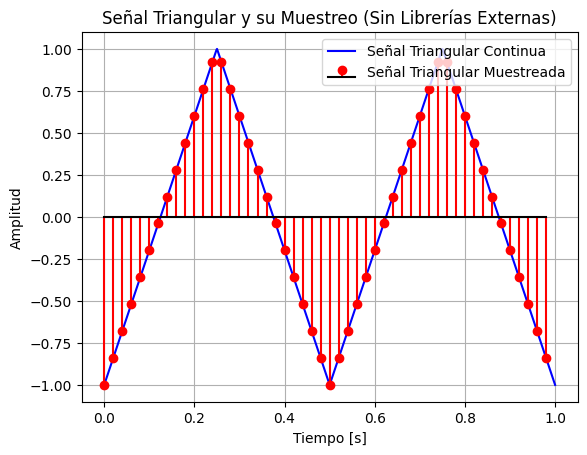

In [50]:
# Parámetros
f = 2           # Frecuencia de la señal triangular (Hz)
fs = 50         # Frecuencia de muestreo (Hz)
T = 1           # Duración de la señal (segundos)
t_cont = np.linspace(0, T, 1000)  # Tiempo continuo

# Generación de señal triangular manual
# Periodo
T0 = 1 / f
# Función triangular básica
def triangular_wave(t, T0):
    return 2 * np.abs(2 * ((t / T0) - np.floor(t / T0 + 0.5))) - 1

x_cont = triangular_wave(t_cont, T0)

# Muestreo
t_sampleada = np.arange(0, T, 1/fs)
x_sampleada = triangular_wave(t_sampleada, T0)

# Graficar
plt.plot(t_cont, x_cont, label='Señal Triangular Continua', color='blue')
plt.stem(t_sampleada, x_sampleada, linefmt='r-', markerfmt='ro', basefmt='k', label='Señal Triangular Muestreada')
plt.title('Señal Triangular y su Muestreo (Sin Librerías Externas)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

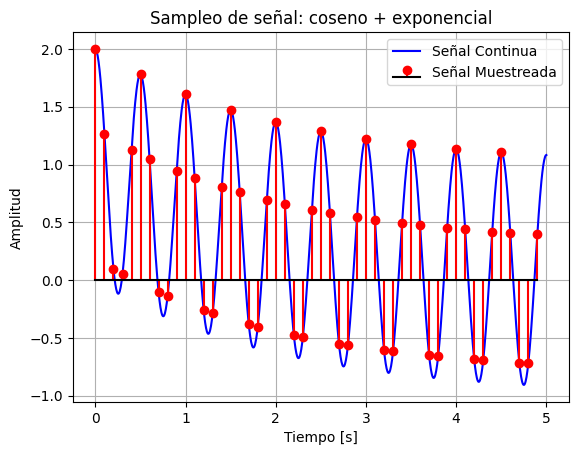

In [51]:
# Parámetros
f1 = 2        # Frecuencia del coseno
alpha = 0.5   # Tasa de decaimiento exponencial
fs = 10       # Frecuencia de muestreo
T = 5         # Duración total (segundos)

# Señal continua
t = np.linspace(0, T, 1000)
def x(t):
    return np.cos(2 * np.pi * f1 * t) + np.exp(-alpha * t)

x_t = x(t)

# Muestreo
t_sampleada = np.arange(0, T, 1/fs)
x_sampleada = x(t_sampleada)

# Gráfica
plt.plot(t, x_t, label='Señal Continua', color='blue')
plt.stem(t_sampleada, x_sampleada, linefmt='r-', markerfmt='ro', basefmt='k', label='Señal Muestreada')
plt.title('Sampleo de señal: coseno + exponencial')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()


### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax. 

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

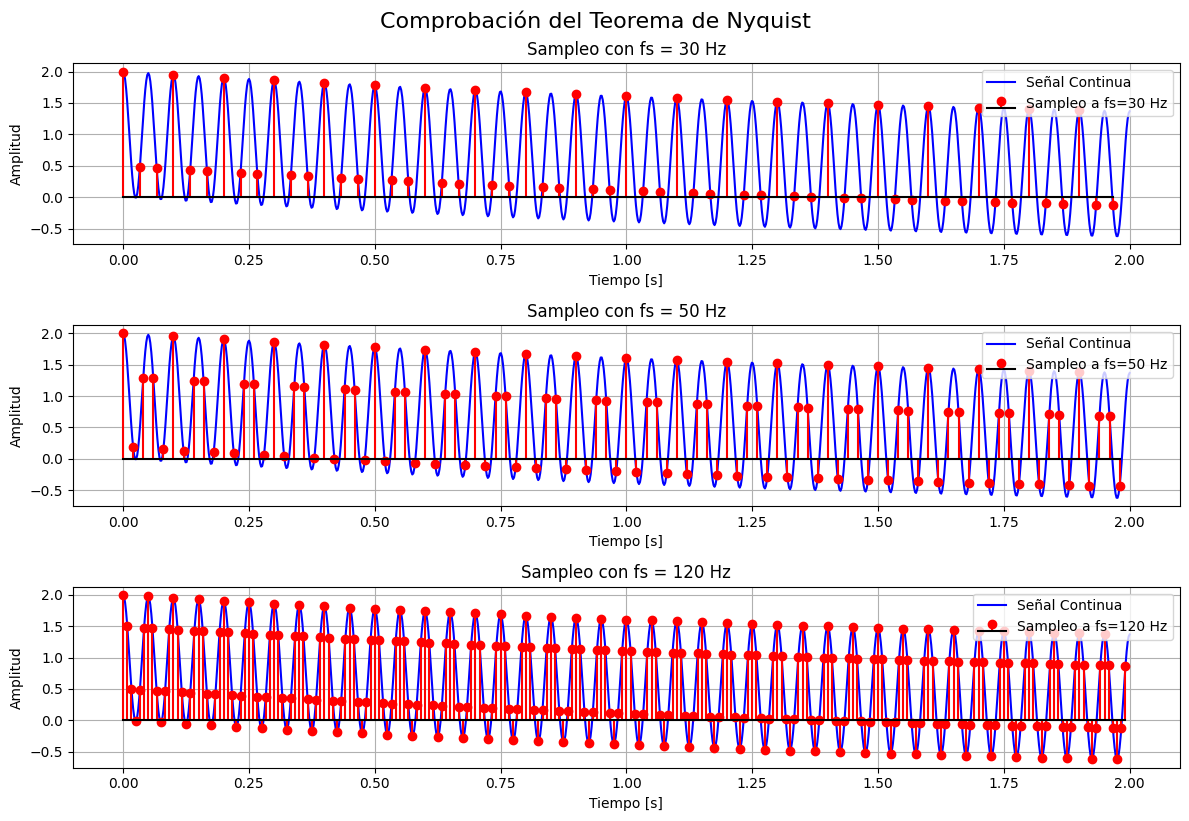

In [52]:
# Señal original
f1 = 20       # Hz
alpha = 0.5   # Decaimiento exponencial
T = 2         # Tiempo de análisis
t = np.linspace(0, T, 1000)

def x(t):
    return np.cos(2 * np.pi * f1 * t) + np.exp(-alpha * t)

x_t = x(t)

# Frecuencias de muestreo a evaluar. 
fs_v = [30, 50, 120]

# Gráficas comparativas
plt.figure(figsize=(12, 8))
for i, fs in enumerate(fs_v):
    t_sampleada = np.arange(0, T, 1/fs)
    x_sampleada = x(t_sampleada)

    plt.subplot(3, 1, i+1)
    plt.plot(t, x_t, label='Señal Continua', color='blue')
    plt.stem(t_sampleada, x_sampleada, linefmt='r-', markerfmt='ro', basefmt='k', label=f'Sampleo a fs={fs} Hz')
    plt.title(f'Sampleo con fs = {fs} Hz')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle('Comprobación del Teorema de Nyquist', fontsize=16, y=1.02)
plt.show()

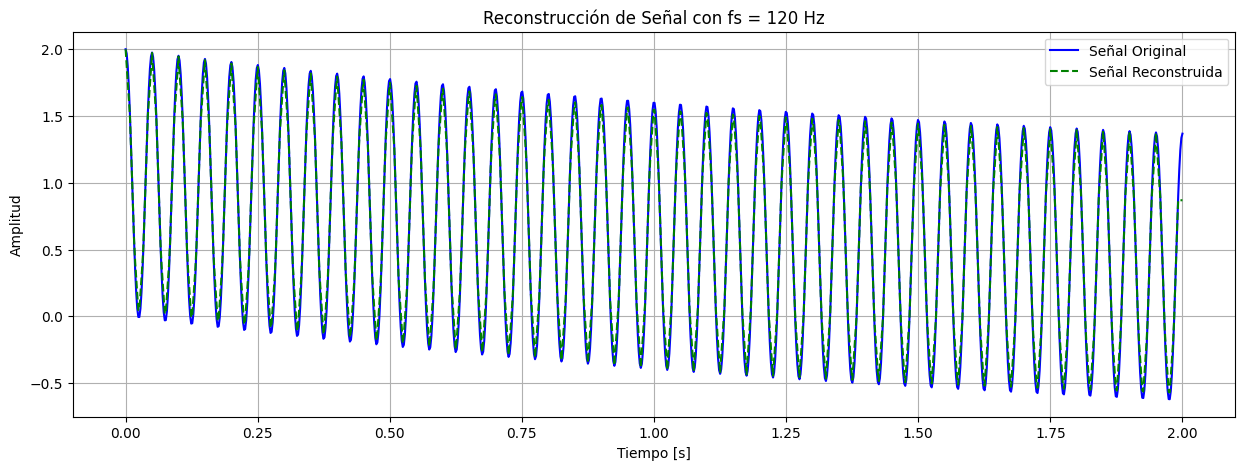

In [53]:
# Reconstrucción por interpolación lineal
x_reconstructed = np.interp(t, t_sampleada, x_sampleada)

# Gráfica
plt.figure(figsize=(15, 5))
plt.plot(t, x_t, label='Señal Original', color='blue')
plt.plot(t, x_reconstructed, label='Señal Reconstruida', color='green', linestyle='--')
plt.title(f'Reconstrucción de Señal con fs = {fs} Hz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

## 4. Análisis en el dominio de la frecuencia


### 4.1 Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


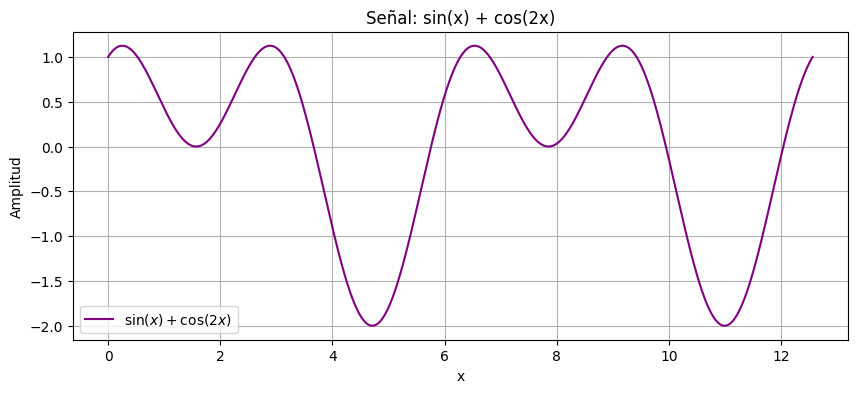

In [54]:
# Definir el eje x (tiempo o variable independiente)
x = np.linspace(0, 4 * np.pi, 1000)

# Definir la señal: sin(x) + cos(2x)
y = np.sin(x) + np.cos(2 * x)

# Graficar
plt.figure(figsize=(10, 4))
plt.plot(x, y, label=r'$\sin(x) + \cos(2x)$', color='purple')
plt.title('Señal: sin(x) + cos(2x)')
plt.xlabel('x')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()


### 4.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

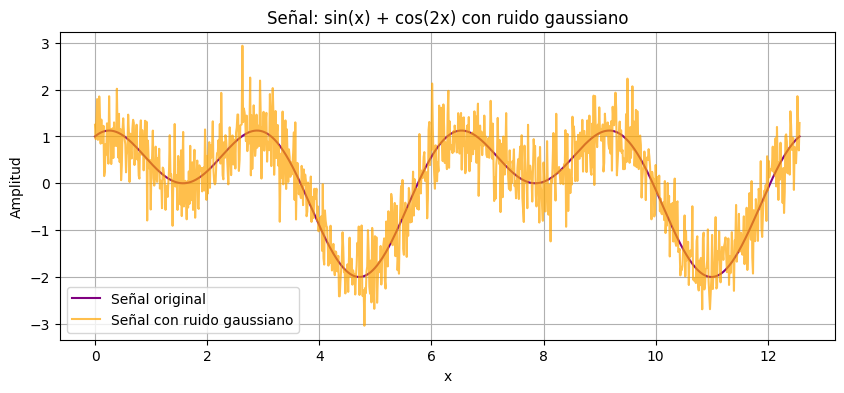

In [55]:
# Señal limpia
y_clean = np.sin(x) + np.cos(2 * x)

# Añadir ruido gaussiano (media = 0, desviación estándar = 0.5)
np.random.seed(42)  # Para reproducibilidad
noise = np.random.normal(0, 0.5, size=len(x))
y_noisy = y_clean + noise

# Graficar
plt.figure(figsize=(10, 4))
plt.plot(x, y_clean, label='Señal original', color='purple')
plt.plot(x, y_noisy, label='Señal con ruido gaussiano', color='orange', alpha=0.7)
plt.title('Señal: sin(x) + cos(2x) con ruido gaussiano')
plt.xlabel('x')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

### 4.3 Obtenga la transformada de Fourier para las dos señales que generaste previamente


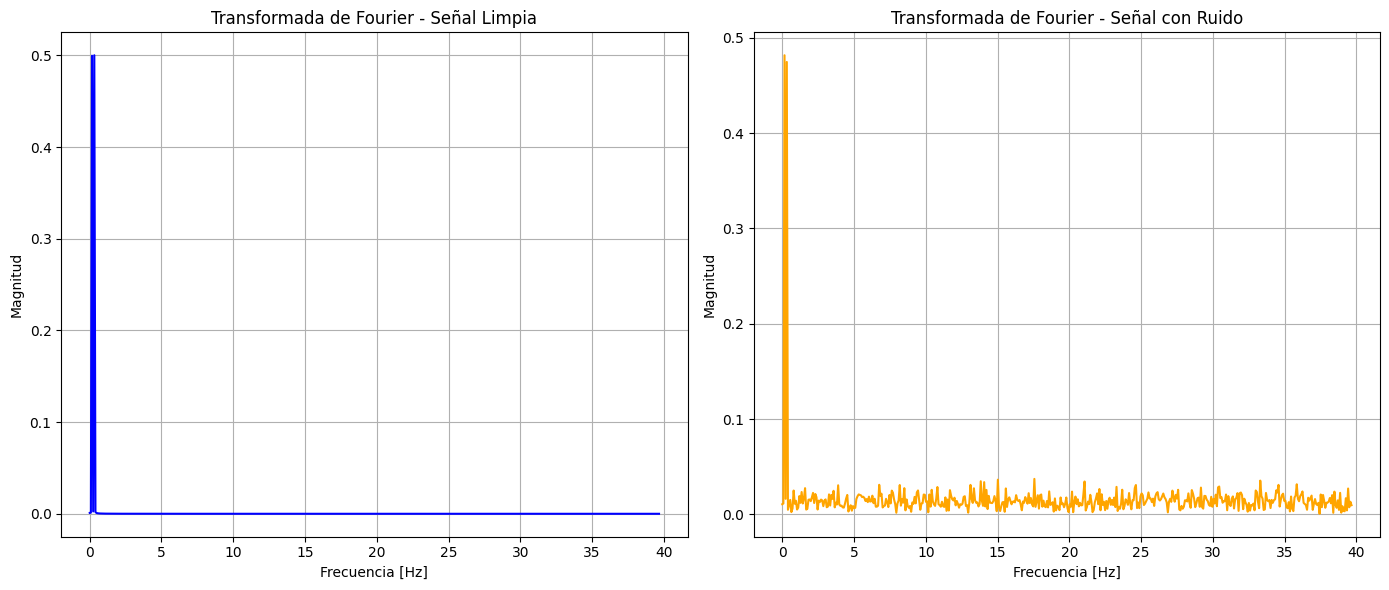

In [56]:
# Señal: sin(x) + cos(2x)
x = np.linspace(0, 4 * np.pi, 1000)
y_clean = np.sin(x) + np.cos(2 * x)

# Señal con ruido gaussiano
np.random.seed(42)
noise = np.random.normal(0, 0.5, size=len(x))
y_noisy = y_clean + noise

# Frecuencia de muestreo (estimada del espaciado de x)
T = x[1] - x[0]  # periodo de muestreo
fs = 1 / T       # frecuencia de muestreo

# FFT para ambas señales
def compute_fft(y, fs):
    N = len(y)
    Y = np.fft.fft(y)
    freqs = np.fft.fftfreq(N, d=1/fs)
    magnitude = np.abs(Y) / N  # Magnitud normalizada
    return freqs[:N//2], magnitude[:N//2]  # Solo la mitad positiva

freqs_clean, mag_clean = compute_fft(y_clean, fs)
freqs_noisy, mag_noisy = compute_fft(y_noisy, fs)

# Gráficas
plt.figure(figsize=(14, 6))

# FFT señal limpia
plt.subplot(1, 2, 1)
plt.plot(freqs_clean, mag_clean, color='blue')
plt.title('Transformada de Fourier - Señal Limpia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)

# FFT señal con ruido
plt.subplot(1, 2, 2)
plt.plot(freqs_noisy, mag_noisy, color='orange')
plt.title('Transformada de Fourier - Señal con Ruido')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)

plt.tight_layout()
plt.show()

### 4.4 Obten un resultado Normalizado: 
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

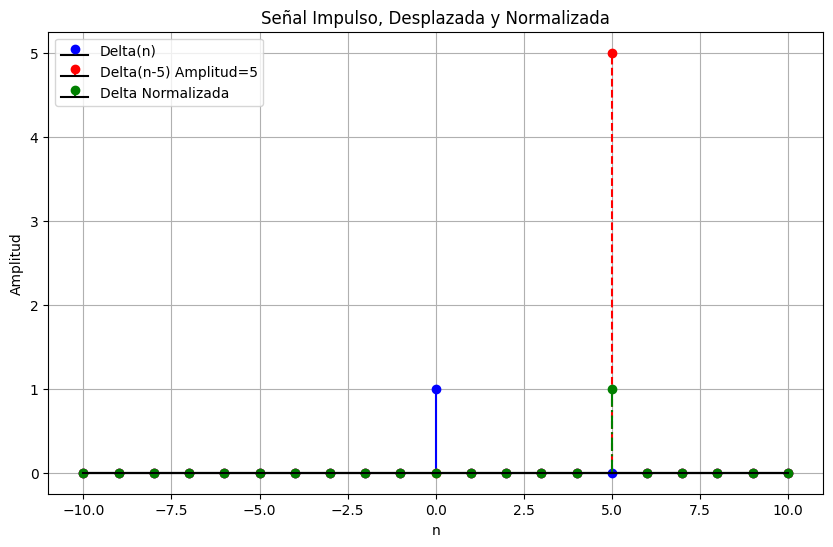

In [57]:
#El objetivo de un resultado normalizado en una Señal es ajustar sus cacomponentes para que tenga ciertas caracteristacas

#En este caso le cambiamos la magnitud a las Señal ya que la original era de magnitud 1, por lo que al normalizarla queda igual

# Parámetros
n = np.arange(-10, 11)  # Rango de tiempo discreto
delta = np.zeros_like(n)
delta[n == 0] = 1  # Impulso original

# Impulso desplazado con amplitud modificada
desplazamiento = 5
delta_desplazada = np.zeros_like(n)
delta_desplazada[n == desplazamiento] = 5  # Valor mayor que 1

# Normalización por amplitud máxima
amplitud_max = np.max(np.abs(delta_desplazada))
delta_normalizada = delta_desplazada / amplitud_max  # Ahora su valor máximo es 1

# Gráfica
plt.figure(figsize=(10, 6))
plt.stem(n, delta, linefmt='b-', markerfmt='bo', basefmt='k', label='Delta(n)')
plt.stem(n, delta_desplazada, linefmt='r--', markerfmt='ro', basefmt='k', label=f'Delta(n-{desplazamiento}) Amplitud=5')
plt.stem(n, delta_normalizada, linefmt='g-.', markerfmt='go', basefmt='k', label='Delta Normalizada')
plt.title('Señal Impulso, Desplazada y Normalizada')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

### 4.5 Encuentra la transformada inversa de Fourier
_Solo para una señal de las dos que generaste inicialmente_.

En este caso puede usar una librería. 

Explica en detalle que hace la librería y el resultado que arroja.

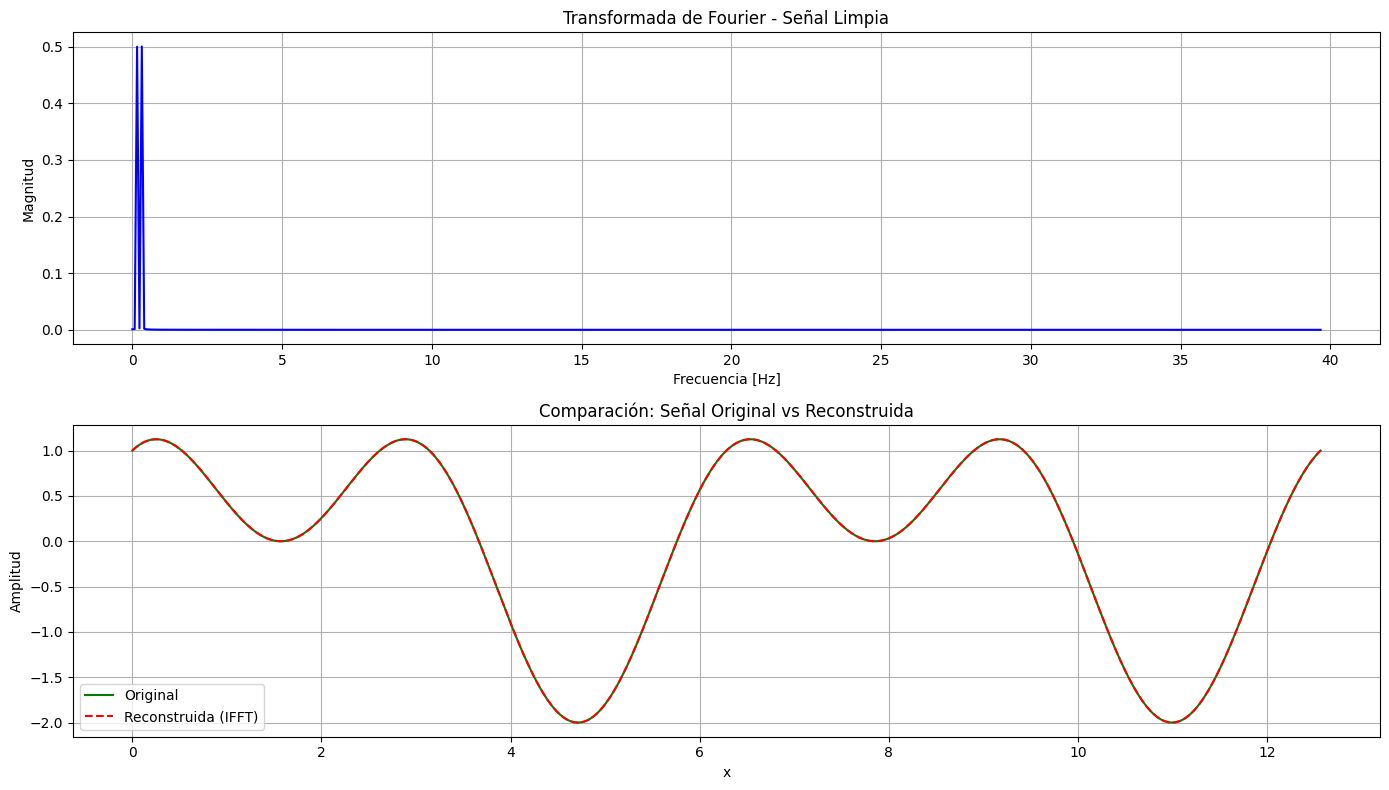

In [58]:
# FFT
def compute_fft(y, fs):
    N = len(y)
    Y = np.fft.fft(y)
    freqs = np.fft.fftfreq(N, d=1/fs)
    magnitude = np.abs(Y) / N
    return freqs[:N//2], magnitude[:N//2], Y

freqs_clean, mag_clean, Y_clean = compute_fft(y_clean, fs)

# Inversa de Fourier (IFFT)
y_reconstructed = np.fft.ifft(Y_clean).real

# Gráficas
plt.figure(figsize=(14, 8))

# FFT señal limpia
plt.subplot(2, 1, 1)
plt.plot(freqs_clean, mag_clean, color='blue')
plt.title('Transformada de Fourier - Señal Limpia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)

# Comparación señal original vs reconstruida
plt.subplot(2, 1, 2)
plt.plot(x, y_clean, label='Original', color='green')
plt.plot(x, y_reconstructed, label='Reconstruida (IFFT)', linestyle='--', color='red')
plt.title('Comparación: Señal Original vs Reconstruida')
plt.xlabel('x')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 5 Explica tus hallazgos (explicar basado en la teoría)
- Explica que comprobaste con relación al sampleo de señales.
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

-Al realizar el sampleo de señales, comprobamos el cumplimiento del Teorema de Nyquist, el cual establece que la frecuencia de muestreo debe ser al menos el doble de la frecuencia máxima de la señal para evitar el aliasing. Cuando se samplea con una frecuencia menor, la señal reconstruida pierde fidelidad, apareciendo distorsionada. Si se cumple la condición de Nyquist, o se samplea con mayor frecuencia aún, la reconstrucción de la señal es posible y precisa, especialmente cuando se utiliza interpolación adecuada.



-También analizamos el efecto del ruido en una señal. Se trabajó principalmente con ruido gaussiano, que es un tipo de ruido continuo y distribuido de forma normal, el cual añade pequeñas perturbaciones en todo el dominio de la señal. Este tipo de ruido afecta la claridad de la señal, pero no altera sus componentes frecuenciales dominantes de forma directa. En la Transformada de Fourier, el ruido gaussiano se refleja como un aumento del contenido en muchas frecuencias, haciendo menos visible la estructura original. 



-La Transformada de Fourier (FT) permite representar una señal del dominio del tiempo en el dominio de la frecuencia, mostrando qué frecuencias están presentes y con qué intensidad. En el primer caso, la señal y_clean = sin(x) + cos(2x) está compuesta por dos funciones senoidales. Al aplicar la FFT, obtenemos un espectro con dos picos bien definidos, cada uno correspondiente a una de las frecuencias presentes en la señal original. Esto indica que la señal contiene solo esas dos frecuencias y nos permite ver cuál es más dominante según su magnitud.

En el segundo caso, analizamos la señal impulso discreta y su versión desplazada . La FT del impulso original es una constante en todas las frecuencias, lo que significa que contiene todas las frecuencias por igual. Es decir, su espectro es completamente plano. Cuando desplazamos el impulso, la FT conserva la misma magnitud en todas las frecuencias pero introduce un cambio de fase, lo cual no afecta la energía ni la distribución de frecuencias, solo el desfase temporal.

En resumen, la FT nos muestra:

En el caso de sin(x) + cos(2x): qué frecuencias componen la señal.

En el caso del impulso: que contiene todas las frecuencias con igual presencia (ideal para análisis).

En el impulso desplazado: que el desplazamiento afecta solo la fase, no la magnitud.





## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html